# ニューラルネットワーク

ニューラルネットワークは、人間の脳に似た層状構造で相互接続されたノードやニューロンを使用するの計算モデルです。

ニューラルネットワークは、画像認識、自然言語処理、音声認識など、さまざまな領域で広く利用されています。特に、大量のデータと計算能力が利用可能になった近年、ディープニューラルネットワーク(DNN)の研究や応用が急速に進展しています。


![](./Figure/NN_history.png)



## ニューラルネットワークの構造

### パーセプトロン

パーセプトロンとは、複数の入力を受け取り、重み付けして、1つの信号を出力するアルゴリズムです。

例えば,$x_1$と$x_2$の2つの入力を受け取り、yを出力するパーセプトロンを考えます。

- $w_1$や$w_2$は各入力の「重み」を表すパラメータで、各入力の重要性をコントロールします。
- $b$はバイアス


```{figure} ./Figure/nn1.png
---
scale: 50%
align: center
---
パーセプトロン
```

パーセプトロンの「○」で表されている部分は、ニューロンやノードと呼びます。



### 活性化関数

活性化関数はニューラルネットワークの各層において、入力データに対して非線形性を導入するために使用される関数です。

例えば、関数の入力(パーセプトロンだと重み付き和)が0以下のとき0を、0より大きいとき1を出力することが考えます。

$$
y   = \begin{cases}
          0 \quad (w_1 x_1 + w_2 x_2 + b \leq 0) \\
          1 \quad (w_1 x_1 + w_2 x_2 + b > 0)
      \end{cases}
$$

出力に関する計算数式を分解すると、

$$y   = h(a)$$
$$h(a)
    = \begin{cases}
          0 \quad (a \leq 0) \\
          1 \quad (a > 0)
      \end{cases}
$$
で書けます。つまり、入力の重み付き和の結果が$a$というノードになり、そして活性化関数$h()$によって$y$という出力が計算されます。


```{figure} ./Figure/nn2.png
---
scale: 50%
align: center
---
活性化関数があるパーセプトロン
```


活性化関数の主な役割は、入力の加重和に非線形な変換を加えることで、ニューラルネットワークが複雑なパターンを学習できるようにすることです。

例えば、線形変換のみで下図右の丸で表される観測データから$x$と$y$の関係を近似した場合、点線のような直線が得られたとします。これでは、一部のデータについてはあまりよく当てはまっていないのが分かります。

しかし、もし図右の実線のような曲線を表現することができれば、両者の関係をより適切に表現することができます。

![](./Figure/transform_function2.gif)


活性化関数にはいくつか種類があり、異なる特性や用途を持っています。

- シグモイド関数 
    - 任意の値を$0$から$1$に変換します

- ReLU
    - 負の入力は0として、0もしくは正の入力はそのまま出力

```{figure} ./Figure/transform_function3.png
---
align: center
---
活性化関数の種類
```

### ニューラルネットワークの仕組み

ニューラルネットワークの仕組みは下の図で表さます。左側から、最初の層を入力層 (input layer)、最後の層を出力層 (output layer)といいます。

その間にある層は中間層 （intermediate layer) もしくは隠れ層 (hidden layer) といいます。中間層において、層の数を増やすことによって、ディープニューラルネットワークを実現することができます。

ニューラルネットワークは、層から層へ、値を変換していきます。 そのため、ニューラルネットワークとはこの変換がいくつも連なってできる一つの大きな関数だと考えることができます。 従って、基本的には、入力を受け取って、何か出力を返すものです。 そして、どのようなデータを入力し、どのような出力を作りたいかによって、入力層と出力層のノード数が決定されます。
 

![](./Figure/nn4.png)

## ニューラルネットワークの計算

それでは、下図に示す$3$層ニューラルネットワークを例として、入力から出力への計算のについて解説を行います。

![](./Figure/nn_a.png)

### 記号の説明

ニューラルネットワークの計算を説明するにあたって、導入される記号の定義から始めます。

入力層の$x_1$と$x_2$ニューロンから、次層のニューロン$a_1^{(1)}$への信号伝達を見ていきます。

- $w_{12}^{(1)}$ は前層の$2$番目のニューロン($x_2$)から次層の$1$番目のニューロン($a_1^{(1)}$)への重みであることを意味します。
    - 右上$(1)$は第$1$層の重みということ意味します
    - 右下$12$ような数字の並びは、次層のニューロン($1$)と前層のニューロンのインデックス番号($2$)から構成されます
- $a_1^{(1)}$は第$1$層$1$番目のニューロンであることを意味します。
    - 右上$(1)$は第$1$層のニューロンということ意味します
    - 右下$1$は$1$番目のニューロンということ意味します
![](./Figure/nn_b.png)

### 各層における信号伝達

まず、入力層から「第$1$層の$1$番目のニューロン」への信号伝達を見ていきます。ここでは。バイアス項も追加し、$a_1^{(1)}$を以下の数式で計算します。

![](./Figure/nn_c.png)

$$
 a_1^{(1)}= w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{2} + b_1^{(1)}
$$

同じ形で、第$1$層におけるすべでのニューロンの計算式を書けます。

$$
\begin{split}\begin{cases}
    a_1^{(1)} = w_{11}^{(1)}x_{1} + w_{12}^{(1)}x_{1}x_{2} + b_1^{(1)} \\
    a_2^{(1)} = w_{21}^{(1)}x_{1} + w_{22}^{(1)}x_{1}x_{2} + b_2^{(1)} \\
    a_3^{(1)} = w_{31}^{(1)}x_{1} + w_{32}^{(1)}x_{1}x_{2} + b_3^{(1)}
\end{cases}\end{split}
$$


行列で第$1$層におけるニューロンの計算式をまとめて表すことができます。
- 入力 $\mathbf{X}=\begin{pmatrix} x_1 & x_2 \end{pmatrix}$
- バイアス $\mathbf{B} = \begin{pmatrix} b_{1}^{(1)} & b_{2}^{(1)} & b_{3}^{(1)} \end{pmatrix}$
- 重み 

$$
\begin{split} \mathbf{W} = \begin{pmatrix}
    w_{11}^{(1)} & w_{21}^{(1)} & w_{31}^{(1)} \\
    w_{12}^{(1)} & w_{22}^{(1)} & w_{32}^{(1)}
\end{pmatrix}\end{split}
$$

- 入力・バイアスと重みの総和: $\mathbf{A} = \begin{pmatrix}
    a_1^{(1)} & a_2^{(1)} & a_3^{(1)}
\end{pmatrix}$

$$
\mathbf{A}^{(1)}
     = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)}
$$



さらに、活性化関数を導入します。入力・バイアスと重みの総和を$a$で表し、活性化関数$h()$による変換された結果を$z$で表すことにします。
![](./Figure/nn_d.png)


### 数値を見ながら計算の流れを確認

それでは、```NumPy```の多次元配列を使って、入力 $x_1$,$x_2$,$x_3$から出力が計算される過程を確認してみましょう。入力、重み、バイアスは適当な値を設定します。

In [7]:
import numpy as np
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],[0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])
print(r"入力の形状: {}".format(X.shape))
print(r"重みの形状: {}".format(W1.shape))
print(r"バイアスの形状: {}".format(B1.shape))

入力の形状: (2,)
重みの形状: (2, 3)
バイアスの形状: (3,)


第一層隠れ層で重み付きとバイアスの総和を計算し、活性化関数で変換された結果を返します。

In [8]:
A1 = np.dot(X, W1) + B1

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [10]:
Z1 = sigmoid(A1)

続いて、同じ形で第1層から第2層目への信号伝達を行います。

In [11]:
W2 = np.array([[0.1, 0.4],[0.2, 0.5],[0.3, 0.6]])
B2 = np.array([0.1, 0.2])

In [12]:
A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

最後に、第2層から出力層への信号を行います。出力層の活性化関数は、恒等関数を用います。

In [13]:
W3 = np.array([[0.1, 0.3],[0.2, 0.4]])
B3 = np.array([0.1, 0.2])

In [14]:
A3 = np.dot(Z2, W3) + B3 # Y = A3

### 出力層の設計
ニューラルネットワークは、分類問題と回帰問題の両方に用いることができます。ただし、分類問題と回帰問題のどちらに用いるかで、出力層の活性化関数を変更する必要があります。

- 回帰問題

    - モデルの出力は連続的な実数値でなければなりません。そのため、出力層に活性化関数を使用しないか、出力の範囲を制限しない活性化関数を使用します。

- 分類問題

    - 分類問題では、モデルの出力を特定のクラスに分類するため、出力は確率として解釈できる必要があります。一般的には クラス数と同じだけのノードを出力層に用意しておき、各ノードがあるクラスに入力が属する確率を表すようにします。 このため、全出力ノードの値の合計が$1$になるよう正規化します。 これには、要素ごとに適用される活性化関数ではなく、層ごとに活性値を計算する別の関数を用いる必要があります。 そのような目的に使用される代表的な関数には、ソフトマックス関数があります。

#### ソフトマックス関数

ソフトマックス関数は複数値からなるベクトルを入力し、それを正規化したベクトルを出力します。ソフトマックス関数は、次の式で定義されます。

$$
y_k = \frac{\exp(a_k)}{\sum_{k'=0}^{K-1} \exp(a_{k'})}
$$



$K$個の要素$\mathbf{a} = (a_0, a_1, \cdots, a_{K-1})$を入力して、$0 \leq y_k \leq 1$、$\sum_{k=0}^{K-1} y_k = 1$となる$\mathbf{y} = (y_0, y_1, \cdots, y_{K-1})$を出力します。つまり、ソフトマックス関数を適用することで、各成分は区間 $(0, 1)$ に収まり、全ての成分の和が $1$ になるため、「確率」として解釈できるようになります。

実装の際、指数関数の計算のため容易に大きな値になり、計算結果は```inf```が返ってきますので、数値が不安定になってしまう「オーバーフロー」問題を対応するため。入力の最大値を引くことで、正しく計算するようにする方法が採用されています。

In [4]:
import numpy as np
def softmax(x):
    c = np.max(x)
    exp_x = np.exp(x - c)
    sum_exp_x = np.sum(exp_x)
    return exp_x / sum_exp_x

In [20]:
print("活性化関数に適用する前に: {}".format(A3))
print("最終出力: {}".format(softmax(A3)))

活性化関数に適用する前に: [0.31682708 0.69627909]
最終出力: [0.40625907 0.59374093]


## ニューラルネットワークの学習

重回帰分析では、最小二乗法などの推定方法で行列計算や微分方程式を用いて解を導出することができます。つまり、実際の数値を使うことなく変数のまま、解（最適なパラメータ）を求めることができました。このように、変数のままで解を求めることを解析的に解くと言い、その答えのことを解析解 (analytical solution) と呼びます。

しかし、ニューラルネットワークで表現されるような複雑な関数の場合、パラメータの数は数億二及ぶこともありますので、最適解を解析的に解くことはほとんどの場合困難です。そのため、別の方法を考える必要があります。具体的には、解析的に解く方法に対し、計算機を使って繰り返し数値計算を行って解を求めることを数値的に解くといい、求まった解は**数値解** (numerical solution) と呼ばれます。

ニューラルネットワークでは、基本的に数値的な手法によって最適なパラメータを求めます。

### 損失関数

損失関数（Loss function）とは、「正解値」と、モデルによる出力された「予測値」とのズレの大きさ（これを「Loss：損失」と呼ぶ）を計算するための関数です。損失関数の値は、学習アルゴリズムがモデルのパラメータを調整する際の指標となります。

#### 平均二乗誤差

平均二乗誤差 (mean squared error) は、回帰問題を解きたい場合によく用いられる目的関数です。 重回帰分析の解説中に紹介した二乗和誤差と似ていますが、各データ点における誤差の総和をとるだけでなく、それをデータ数で割って、誤差の平均値を計算している点が異なります。

$$
L = \frac{1}{N} \sum_{n=1}^N (t_n - y_n)^2
$$

ここで、$N$はサンプルサイズ、$y_n$は$n$個目のデータに対するニューラルネットワークの出力値、$t_n$は$n$個目のデータに対する望ましい正解の値です。

#### 交差エントロピー

交差エントロピー (cross entropy) は、分類問題を解きたい際によく用いられる目的関数です。 

例として、$K$クラスの分類問題を考えてみましょう。 ある入力$x$が与えられたとき、ニューラルネットワークの出力層に$K$個のノードがあり、それぞれがこの入力が$k$番目のクラスに属する確率

$$
y_k = p(y=k|x)
$$

を表しているとします。 これは、入力$x$が与えられたという条件のもとで、予測クラスを意味する$y$が$k$であるような確率、を表す条件付き確率です。

ここで、$x$が所属するクラスの正解が、

$$
{\bf t} = \begin{bmatrix} t_1 & t_2 & \dots & t_K \end{bmatrix}^{\rm T}
$$

というベクトルで与えられているとします。 ただし、このベクトルは$t_k (k=1,2,...,K)$ のいずれか一つだけが$1$であり、それ以外は$0$であるようなベクトルであるとします。

そして、この一つだけ値が$1$となっている要素は、その要素のインデックスに対応したクラスが正解であることを意味します。

以上を用いて、交差エントロピーは以下のように定義されます。

$$
- \sum_{k=1}^{K}t_{k}\log y_{k}
$$

これは、$t_k$が $k=1,2,...,K$ のうち正解クラスである一つの$k$の値でだけ$1$となるので、正解クラスであるような$k$での$\log y_{k}$を取り出して$−1$を掛けているのと同じです。 また、$N$個すべてのサンプルを考慮すると、交差エントロピーは、

```{figure} ./Figure/Average_Loss.png
---
scale: 50%
figclass: margin
---
Average_Loss
```

$$
L = - \sum_{n=1}^{N} \sum_{k=1}^{K}t_{n, k}\log y_{n, k}
$$


````{tab-set}
```{tab-item} 課題
3クラス分類問題を考えます。

予測は$y=(0.1,0.2,0.3)$、真のラベルは$t=(0,0,1)$の場合、交差エントロピーの計算式を書いてください。
```
````

In [21]:
def cross_entropy_error(y, t):
    delta = 1e-7 # log(0)を防ぐための微小値
    return -np.sum(t * np.log(y + delta))

In [33]:
t = np.array([0, 0, 1])
y = np.array([0.1, 0.2, 0.5])

In [34]:
cross_entropy_error(y, t)

0.6931469805599654

```{note}
損失関数は、すべての訓練データを対象として求める必要がありますが、場合によるすべてのデータを一気に計算するのは現実ではありません。そこで、データの中から一部を選びだし、つまりミニバッチごとに学習を行います。このような手法をミニバッチ学習と言います。
```

### 損失関数の最適化

#### 勾配法
下の図は，パラメータ$w$を変化させた際の損失関数$L$の値を表しています。損失関数の値を最小にするようなパラメータの値を求めることで、ニューラルネットワークを訓練します。ただ、実際のニューラルネットワークの目的関数は、多次元で、かつもっと複雑な形をしていることがほとんどです。 そこで、勾配を利用して関数の最小値を探す勾配法がよく用いられます。


![](./Figure/loss_fucnction.png)


勾配は、各地点における関数の傾きであり、関数の値が最も急速に変化する方向と大きさを示します。


今は$L$の値を小さくしたいわけです。勾配の反対方向に進むことで関数の値を最も減らせることができますので、勾配の情報を手がかりに、できるだけ小さな値となる関数の場所を探します。

損失を求めるまでの計算を1つの関数とみなして、重みの勾配$\frac{\partial L}{\partial \mathbf{W}}$ととバイアスの勾配$\frac{\partial L}{\partial \mathbf{b}}$を求めます。各要素は、それぞれパラメータの対応する要素の偏微分です。各パラメータの勾配$\frac{\partial L}{\partial \mathbf{W}}$、$\frac{\partial L}{\partial \mathbf{b}}$を用いて、勾配降下法によりパラメータ$\mathbf{W},\ \mathbf{b}$を更新します。

$$
\begin{aligned}
\mathbf{W}^{(\mathrm{new})}
   &= \mathbf{W}
      - \eta \frac{\partial L}{\partial \mathbf{W}}
\\
\mathbf{b}^{(\mathrm{new})}
   &= \mathbf{b}
      - \eta \frac{\partial L}{\partial \mathbf{b}}
\end{aligned}
$$

$\eta$は学習率と言います。$1$回の学習で、どれだけパラメータを更新するか、ということを決めます。

#### 勾配下降法の実装

##### $f(x)=x^2$に対する最適化

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 関数とその勾配
def function_f(x):
    return x ** 2

def numerical_gradient(f, x, h=1e-5):
    return (f(x + h) - f(x - h)) / (2 * h)

In [4]:
def gradient_descent(initial_x, learning_rate, num_iterations):
    x = initial_x
    x_history = [x]
    
    for i in range(num_iterations):
        grad = numerical_gradient(function_f, x)
        x = x - learning_rate * grad
        x_history.append(x)
        if i % 10 == 0:
            print("Iteration {}: x = {}, f(x) = {}".format(i, x, function_f(x)))
    
    return x_history

In [5]:
# パラメータ設定
initial_x = 5.0
learning_rate = 0.1
num_iterations = 100
x_history = gradient_descent(initial_x, learning_rate, num_iterations)

Iteration 0: x = 4.000000000037858, f(x) = 16.00000000030286
Iteration 10: x = 0.42949672960284735, f(x) = 0.18446744073954138
Iteration 20: x = 0.04611686018453473, f(x) = 0.0021267647932799246
Iteration 30: x = 0.004951760157169053, f(x) = 2.4519928654126888e-05
Iteration 40: x = 0.0005316911983169366, f(x) = 2.826955303677e-07
Iteration 50: x = 5.7089907708557185e-05, f(x) = 3.259257562171577e-09
Iteration 60: x = 6.1299821634977855e-06, f(x) = 3.757668132480099e-11
Iteration 70: x = 6.582018229321577e-07, f(x) = 4.3322963971121544e-13
Iteration 80: x = 7.067388259152989e-08, f(x) = 4.994797680561351e-15
Iteration 90: x = 7.588550360298899e-09, f(x) = 5.758609657079255e-17


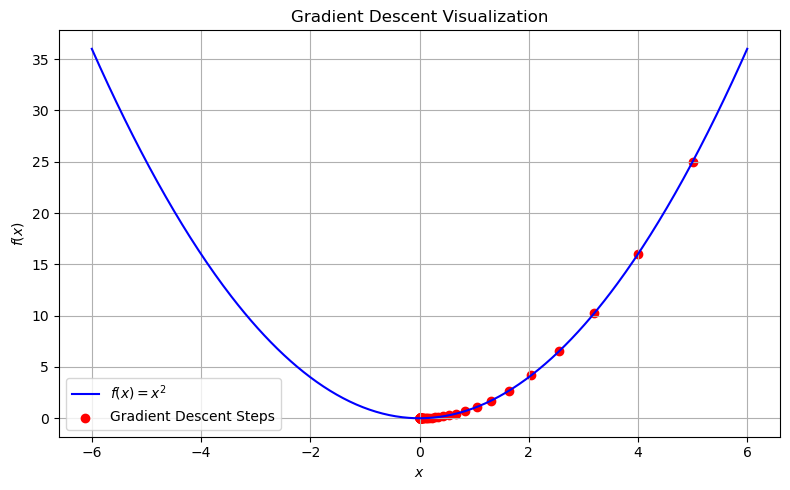

In [6]:
# プロット
x = np.linspace(-initial_x-1, initial_x+1, 400)
y = function_f(x)

plt.figure(figsize=(8,5))
plt.plot(x, y, '-b', label='$f(x) = x^2$')
plt.scatter(x_history, [function_f(i) for i in x_history], c='red', label='Gradient Descent Steps')
plt.title('Gradient Descent Visualization')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

````{tab-set}
```{tab-item} 課題
勾配法で$f(x)=2x^2-10x-80$の最小値を求めます。
- 勾配降下法のアルゴリズムを実装する。
- アルゴリズムを使って関数の最小値を求める。
```
````

##### Example: $f(x_0,x_1)=x_0^2+x_1^2$に対する最適化

今度は、変数が複数(2つ)あるの関数に対する最適化を実装してみます。複数の変数からなる関数の微分は偏微分といいます。

偏微分の場合、複数ある変数の中でターゲットとする変数を一つに絞り、他の変数はある値に固定します。

In [2]:
# 関数定義
def function_f(x):
    return x[0]**2 + x[1]**2
# 勾配
def numerical_gradient(f, x, h = 1e-4):
    grad = np.zeros_like(x)
    # x の各成分について順番にループを回し、数値的に勾配を計算します。
    it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])
    while not it.finished:
        idx = it.multi_index
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x) # f(x+h)

        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)

        grad[idx] = (fxh1 - fxh2) / (2*h)

        x[idx] = tmp_val 
        it.iternext()   

    return grad

def gradient_descent(f, init_x, lr=0.01, num_iterations=100):
    x = init_x
    x_history = [x.copy()]

    for i in range(num_iterations):
        grad = numerical_gradient(f, x)
        x -= lr * grad
        x_history.append(x.copy())

    return np.array(x_history)

```numerical_gradient```ちう関数で、配列の各要素に対して数値微分を求めます。例えば、点$(-3,4)$での勾配を求めてみます。

勾配が示す方向は、各場所において関数の値を最も減らす方向であり、その方向に晋ことで関数の値を最も減らせることができます。つまり、勾配の情報を手がかりに、進む方向を決めるべきでしょう。

In [5]:
# 勾配の計算
numerical_gradient(function_f, np.array([-3.0, 4.0]))

array([-6.,  8.])

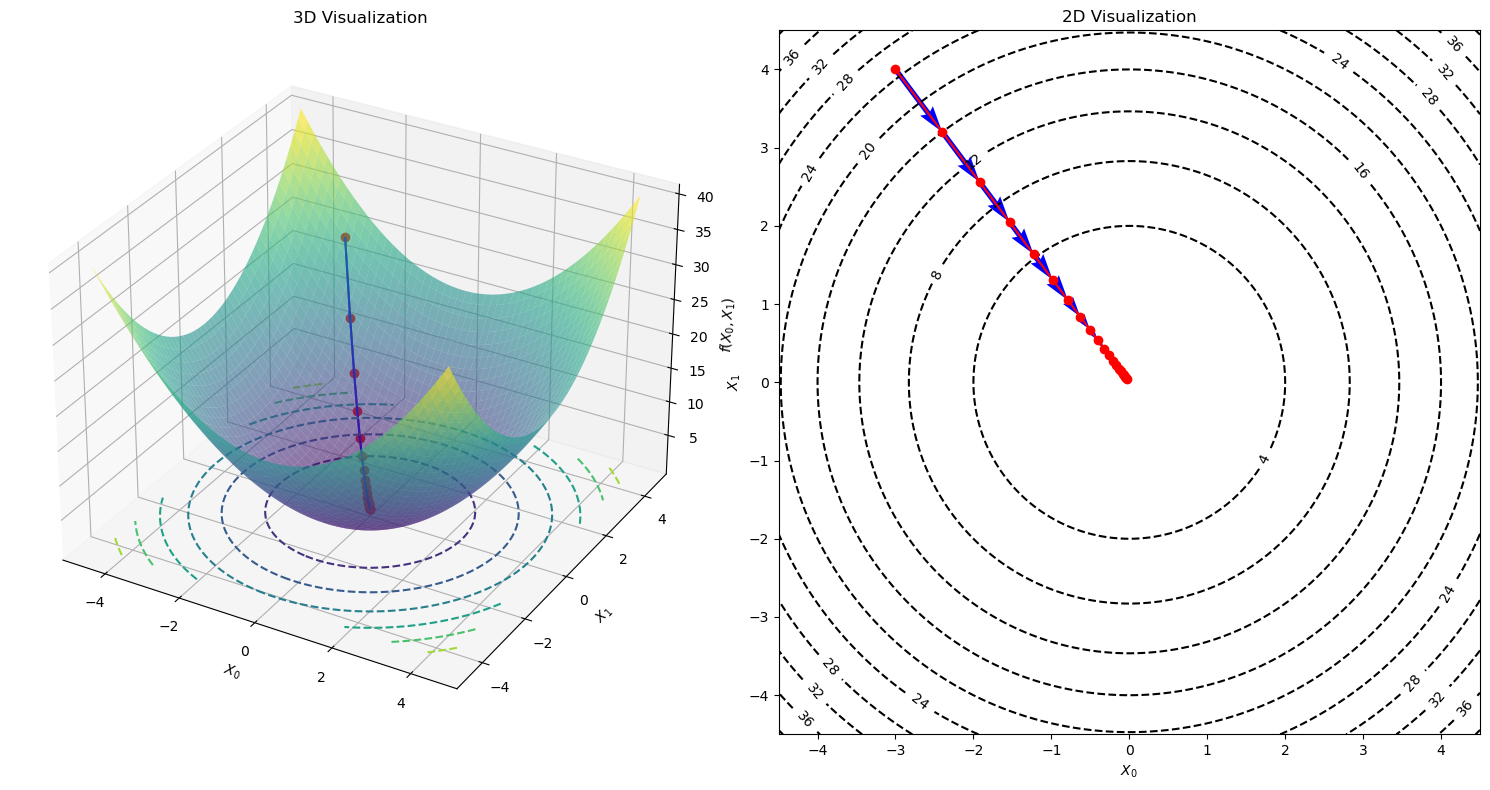

In [123]:
# Parameters
init_x = np.array([-3.0, 4.0])
lr = 0.1
num_iterations = 20

# Run gradient descent
x_history = gradient_descent(function_f, init_x, lr, num_iterations)

# Generate mesh data for visualization
x = np.linspace(-4.5, 4.5, 200)
y = np.linspace(-4.5, 4.5, 200)
X, Y = np.meshgrid(x, y)
Z = X**2 + Y**2

fig = plt.figure(figsize=(15, 8))
# 1st subplot: 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.plot_surface(X, Y, Z, cmap='viridis', alpha=0.6)
ax1.contour(X, Y, Z, zdir='z', offset=0, cmap='viridis', linestyles='dashed')
Z_history = np.array([function_f(x) for x in x_history])
ax1.plot(x_history[:, 0], x_history[:, 1], Z_history, 'o-', color='red')
for i in range(1, len(x_history)):
    ax1.quiver(x_history[i-1][0], x_history[i-1][1], Z_history[i-1], 
               x_history[i][0]-x_history[i-1][0], 
               x_history[i][1]-x_history[i-1][1], 
               Z_history[i]-Z_history[i-1], 
               color="blue", arrow_length_ratio=0.05)
ax1.set_xlabel("$X_0$")
ax1.set_ylabel("$X_1$")
ax1.set_zlabel("$f(X_0, X_1)$")
ax1.set_title("3D Visualization")

# 2nd subplot: 2D contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contour(X, Y, Z, levels=10, colors='black', linestyles='dashed')
ax2.clabel(contour)
for i in range(1, len(x_history)):
    ax2.quiver(x_history[i-1][0], x_history[i-1][1], 
               x_history[i][0]-x_history[i-1][0], 
               x_history[i][1]-x_history[i-1][1], 
               angles="xy", scale_units="xy", scale=1, color="blue")
ax2.plot(x_history[:, 0], x_history[:, 1], 'o-', color='red')
ax2.set_xlim(-4.5, 4.5)
ax2.set_ylim(-4.5, 4.5)
ax2.set_xlabel("$X_0$")
ax2.set_ylabel("$X_1$")
ax2.set_title("2D Visualization")

# Display the figure
plt.tight_layout()
plt.show()

#### ニューラルネットワークに対する勾配

ニューラルネットワークにおいて、重みパラメータの勾配を求める計算を確認します。

ここで、形状が$2 \times 3$の重み$\mathbf{W}$を持つニューラルネットワークがあり、損失関数を$L$で表すことを考えましょう。この場合、勾配は$\frac{\partial L}{\partial \mathbf{W}}$で表すことができます。

$$

\mathbf{W}
    = \begin{pmatrix}
          w_{0,0} & w_{0,1} & w_{0,2} \\
          w_{1,0} & w_{1,1} & w_{1,2}
      \end{pmatrix},

\frac{\partial L}{\partial \mathbf{W}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial w_{0,0}} & \frac{\partial L}{\partial w_{0,1}} & \frac{\partial L}{\partial w_{0,2}} \\
          \frac{\partial L}{\partial w_{1,0}} & \frac{\partial L}{\partial w_{1,1}} & \frac{\partial L}{\partial w_{0,2}}
      \end{pmatrix}
$$

In [136]:
# (仮の)入力データを作成
x = np.array([0.6, 0.9])
print(x)

# (仮の)教師データを作成
t = np.array([0, 0, 1])
print(t)

[0.6 0.9]
[0 0 1]


In [137]:
np.random.seed(0) # 乱数のシードを固定
class simplenet:
    def __init__(self):
        self.W = np.random.randn(2, 3)# 重みを初期化する関数を定義
    def predict(self, x):
        return np.dot(x, self.W) # 重み付き和を計算
    def loss(self, x, t):
        z = self.predict(x)
        y = softmax(z) # ソフトマックス関数による正規化
        loss = cross_entropy_error(y, t) # 交差エントロピー誤差を計算
        return loss 

In [138]:
net = simplenet()
p = net.predict(x)
print(p)

[ 3.07523529  1.92089652 -0.2923073 ]


In [139]:
net.loss(x, t)

3.6674507891066104

続いて、勾配を求めてみましょう。

In [140]:
# 損失メソッドを実行する関数を作成
def f(W):
    # 損失メソッドを実行
    return net.loss(x, t)

In [141]:
# 損失を計算
L = f(net.W)
print(L)

3.6674507891066104


In [142]:
# 重みの勾配を計算
dW = numerical_gradient(f, net.W)
print(dW)

[[ 0.44452826  0.14014461 -0.58467287]
 [ 0.66679239  0.21021692 -0.87700931]]


これで重みの勾配$\frac{\partial L}{\partial \mathbf{W}}$を得られました。

その中身を見ると、例えば、$\frac{\partial L}{\partial \mathbf{W_{1,1}}}$はおよそ$0.44$ということは、$w_{1,1}$を$h$だけ増やすと損失関数の値は$0.44h$だけ増加することを意味します。

そのため、損失関数の値を減らすために、$w_{1,1}$はマイナス方向へ更新するのが良いことがわかりました。

パラメータの勾配が得られたということは、パラメータの学習を行えるようになったということです。

## 2層ニューラルネットワークの実装

これまでに勉強した、「損失関数」、「ミニバッチ」、「勾配」、「勾配下降法」をまとめて、ニューラルネットワークの学習手順を確認します。

- ミニバッチ: データセットからミニバッチをランダムに取り出す。ここでは、そのミニバッチの損失関数の値を減らすkとを目的とする。
- 勾配の算出：各重みパラメータの勾配を求める。
- パラメーターの更新：重みパラメータを勾配方向に微少量だけ更新する。
- 収束するまで繰り返す

ここでは、2層のニューラルネットワークの計算と最適化プロセスを確認しましょう。　


### 数式の確認

#### 入力層

ニューラルネットワークの入力$\mathbf{X}$、第$1$層の重み$\mathbf{W^{(1)}}$と$\mathbf{b}^{(1)}$を次の形状とします。

$$
\mathbf{X}
    = \begin{pmatrix}
          x_{0,0} & x_{0,1} & \cdots & x_{0,D-1} \\
          x_{1,0} & x_{1,1} & \cdots & x_{1,D-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          x_{N-1,0} & x_{N-1,1} & \cdots & x_{N-1,D-1}
      \end{pmatrix}
,\ 
\mathbf{W}^{(1)}
    = \begin{pmatrix}
          w_{0,0} & w_{0,1} & \cdots & w_{0,H-1} \\
          w_{1,0} & w_{1,1} & \cdots & w_{1,H-1} \\
          \vdots &\vdots & \ddots & \vdots \\
          w_{D-1,0} & w_{D-1,1} & \cdots & w_{D-1,H-1}
      \end{pmatrix}
,\ 
\mathbf{b}^{(1)}
    = \begin{pmatrix}
          b_0 & b_1 & \cdots & b_{H-1}
      \end{pmatrix}
$$

ここで、$\mathbf{N}$はバッチサイズ、$\mathbf{D}$は各データ$\mathbf{x}_n = (x_{n,0}, \cdots, x_{n,D-1})$の要素数、、$\mathbf{H}$は中間層のニューロン数です。

#### 隠れ層

第$1$層の重み付き和$\mathbf{A}^{(1)}$を計算します。

$$
\mathbf{A}^{(1)}
    = \mathbf{X} \mathbf{W}^{(1)} + \mathbf{B}^{(1)}
$$

$\mathbf{N} \times \mathbf{D}$と$\mathbf{D} \times \mathbf{H}$の行列の積なので、計算結果は$\mathbf{N} \times \mathbf{H}$の行列になります。

$$
\mathbf{A}^{(1)}
    = \begin{pmatrix}
          a_{0,0} & a_{0,1} & \cdots & a_{0,H-1} \\
          a_{1,0} & a_{1,1} & \cdots & a_{1,H-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          a_{N-1,0} & a_{N-1,1} & \cdots & a_{N-1,H-1}
      \end{pmatrix}
$$

重み付き和$\mathbf{A}^{(1)}$の各要素をシグモイド関数により活性化します。

$$
z_{n,h}
    = \mathrm{sigmoid}(a_{n,h})
$$

ただ、活性化関数は形状($\mathbf{N} \times \mathbf{H}$)に影響しません。第1層の出力の結果は、

$$
\mathbf{Z}
    = \begin{pmatrix}
          z_{0,0} & z_{0,1} & \cdots & z_{0,H-1} \\
          z_{1,0} & z_{1,1} & \cdots & z_{1,H-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          z_{N-1,0} & z_{N-1,1} & \cdots & z_{N-1,H-1}
      \end{pmatrix}
$$

になります。

#### 出力層

次に、第$2$層の重み$\mathbf{W^{(2)}}$と$\mathbf{b}^{(2)}$は以下のように形状しています。

$$
\mathbf{W}^{(2)}
    = \begin{pmatrix}
          w_{0,0} & w_{0,1} & \cdots & w_{0,K-1} \\
          w_{1,0} & w_{1,1} & \cdots & w_{1,K-1} \\
          \vdots &\vdots & \ddots & \vdots \\
          w_{H-1,0} & w_{H-1,1} & \cdots & w_{H-1,K-1}
      \end{pmatrix}
,\ 
\mathbf{b}^{(2)}
    = \begin{pmatrix}
          b_0 & b_1 & \cdots & b_{K-1}
      \end{pmatrix}
$$

ここで、$\mathbf{H}$は中間層のニューロン数、$\mathbf{K}$は出力層のクラス数です。

第2層の重み付き和$\mathbf{A}^{(2)}$は

$$
\mathbf{A}^{(2)}
    = \mathbf{Z} \mathbf{W}^{(2)} + \mathbf{B}^{(2)}
$$

$\mathbf{N} \times \mathbf{H}$と$\mathbf{H} \times \mathbf{K}$の行列の積なので、計算結果は$\mathbf{N} \times \mathbf{K}$の行列になります。

$$
\mathbf{A}^{(2)}
    = \begin{pmatrix}
          a_{0,0} & a_{0,1} & \cdots & a_{0,K-1} \\
          a_{1,0} & a_{1,1} & \cdots & a_{1,K-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          a_{N-1,0} & a_{N-1,1} & \cdots & a_{N-1,K-1}
      \end{pmatrix}
$$

ここで、ソフトマックス関数により各データの重み付き和$a_{n}^{(2)}$を活性化して、ニューラルネットワークの出力$y_n$とします。

$$
\mathbf{y}_n
    = \mathrm{softmax}(\mathbf{a}_n^{(2)})
$$

$\mathbf{Y}$でニューラルネットワークの出力を表します。$n$番目のデータに関する出力$\mathbf{y}_n$は、$0 \leq y_{n,k} \leq 1$、$\sum_{k=0}^{K-1} y_{n,k} = 1$に正規化されており、$n$番目の入力データ$\mathbf{x}_n$がどのクラスのかを表す確率分布として扱えるのでした。

$$
\mathbf{Y}
    = \begin{pmatrix}
          y_{0,0} & y_{0,1} & \cdots & y_{0,K-1} \\
          y_{1,0} & y_{1,1} & \cdots & y_{1,K-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          y_{N-1,0} & y_{N-1,1} & \cdots & y_{N-1,K-1}
      \end{pmatrix}
$$

#### 損失の計算

$N$個のデータに関する教師データ$\mathbf{T}$は、出力$\mathbf{Y}$と同じ形状になります。

$$
\mathbf{T}
    = \begin{pmatrix}
          t_{0,0} & t_{0,1} & \cdots & t_{0,K-1} \\
          t_{1,0} & t_{1,1} & \cdots & t_{1,K-1} \\
          \vdots & \vdots & \ddots & \cdots \\
          t_{N-1,0} & t_{N-1,1} & \cdots & t_{N-1,K-1}
      \end{pmatrix}
$$

特に、分類問題の場合、各データの教師データ$t_n$は、、正解ラベルが$1$でそれ以外が$0$といった形になります。

(平均)交差エントロピー誤差を計算して、損失$L$とします。

$$
L   = - \frac{1}{N}
        \sum_{n=0}^{N-1} \sum_{k=0}^{K-1}
          t_{n,k} \log y_{n,k}
$$

#### 勾配の計算

損失を求めるまでの計算を1つの関数とみなして、重みの勾配$\frac{\partial L}{\partial \mathbf{W}}$とバイアスの勾配$\frac{\partial L}{\partial \mathbf{b}}$を求めます。

第$1$層のパラメータ$\mathbf{W}^{(1)},\ \mathbf{b}^{(1)}$を$\frac{\partial L}{\partial \mathbf{W}^{(1)}},\ \frac{\partial L}{\partial \mathbf{b}^{(1)}}$で表します。

$$
\frac{\partial L}{\partial \mathbf{W}^{(1)}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial w_{0,0}} & \frac{\partial L}{\partial w_{0,1}} & \cdots & \frac{\partial L}{\partial w_{0,H-1}} \\
          \frac{\partial L}{\partial w_{1,0}} & \frac{\partial L}{\partial w_{a,1}} & \cdots & \frac{\partial L}{\partial w_{1,H-1}} \\
          \vdots & \vdots & \ddots & \vdots \\
          \frac{\partial L}{\partial w_{D-1,0}} & \frac{\partial L}{\partial w_{D-1,1}} & \cdots & \frac{\partial L}{\partial w_{D-1,H-1}} \\
      \end{pmatrix}
,\ 
\frac{\partial L}{\partial \mathbf{b}^{(1)}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial b_0} & \frac{\partial L}{\partial b_1} & \cdots & \frac{\partial L}{\partial b_{H-1}}
      \end{pmatrix}

$$

同様に、第$2$層のパラメータ$\mathbf{W}^{(2)},\ \mathbf{b}^{(2)}$を$\frac{\partial L}{\partial \mathbf{W}^{(2)}},\ \frac{\partial L}{\partial \mathbf{b}^{(2)}}$で表します。

$$
\frac{\partial L}{\partial \mathbf{W}^{(2)}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial w_{0,0}} & \frac{\partial L}{\partial w_{0,1}} & \cdots & \frac{\partial L}{\partial w_{0,K-1}} \\
          \frac{\partial L}{\partial w_{1,0}} & \frac{\partial L}{\partial w_{a,1}} & \cdots & \frac{\partial L}{\partial w_{1,K-1}} \\
          \vdots & \vdots & \ddots & \vdots \\
          \frac{\partial L}{\partial w_{H-1,0}} & \frac{\partial L}{\partial w_{H-1,1}} & \cdots & \frac{\partial L}{\partial w_{H-1,K-1}} \\
      \end{pmatrix}
,\ 
\frac{\partial L}{\partial \mathbf{b}^{(2)}}
    = \begin{pmatrix}
          \frac{\partial L}{\partial b_0} & \frac{\partial L}{\partial b_1} & \cdots & \frac{\partial L}{\partial b_{K-1}}
      \end{pmatrix}

$$

各要素は、それぞれパラメータの対応する要素の偏微分です。

#### パラメータの更新

各パラメータの勾配、$\frac{\partial L}{\partial \mathbf{W}},\ \frac{\partial L}{\partial \mathbf{b}}$を用いて、勾配降下法によりパラメータ$\mathbf{W},\ \mathbf{b}$を更新します。

更新後のパラメータを$\mathbf{W}^{(\mathrm{new})},\ \mathbf{b}^{(\mathrm{new})}$とすると、更新式は次の式で表せます。

$$
\begin{aligned}
\mathbf{W}^{(\mathrm{new})}
   &= \mathbf{W}
      - \eta \frac{\partial L}{\partial \mathbf{W}}
\\
\mathbf{b}^{(\mathrm{new})}
   &= \mathbf{b}
      - \eta \frac{\partial L}{\partial \mathbf{b}}
\end{aligned}
$$

各要素に注目すると、それぞれ次の計算をしています。

$$
\begin{aligned}
w_{h,k}^{(\mathrm{new})}
   &= w_{h,k} - \eta \frac{\partial L}{\partial w_{h,k}}
\\
b_k^{(\mathrm{new})}
   &= b_k - \eta \frac{\partial L}{\partial b_k}
\end{aligned}
$$
